## Imports

In [11]:
# Import des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
plt.style.use('seaborn-whitegrid')
import seaborn as sns

import numpy

import statsmodels.api as sm
import scipy.stats as scs

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import scale


#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit

import warnings
warnings.filterwarnings('ignore')

## Partie 1 : ANALYSES BIVARIES

In [24]:
data = pd.read_csv("DATA/df_encod.csv", sep=',')
data

,Unnamed: 0,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
0,0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0,1,0,0,0
1,1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1,0,0,0,0
2,2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0,1,0,0,0
3,3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1,0,0,0,0
4,4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0,1,0,0,0
16508,16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0,0,0,1,0
16509,16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0,1,0,0,0
16510,16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1,0,0,0,0


In [16]:
# data_genuine1= data.groupby("location_<1H OCEAN").count()
# data_genuine.plot.pie(y="median_house_value",figsize=(8, 8),
#                                 explode = [0, 0.1],
#                                 labels = ["other location", "location_<1H OCEAN"],
#                                 autopct = '%1.1f%%',
#                                 pctdistance = 0.3, labeldistance = 0.5)

# plt.title('Répartition par localisation', 
#   loc='center', 
#   fontsize=22)
# plt.show()

In [19]:
liste_var = data
for var in liste_var :
    print(var,":",scs.ks_2samp(data[var],list(np.random.normal(np.mean(data[var]), np.std(data[var]), 1000))))

Unnamed: 0 : KstestResult(statistic=0.07642732558139534, pvalue=3.0861066037100506e-05)
ID : KstestResult(statistic=0.05714341085271321, pvalue=0.004060323471818845)
longitude : KstestResult(statistic=0.20481104651162785, pvalue=3.6576620291153657e-35)
latitude : KstestResult(statistic=0.2437475775193798, pvalue=8.192204583560975e-50)
housing_median_age : KstestResult(statistic=0.05736967054263567, pvalue=0.0038658664559585534)
total_rooms : KstestResult(statistic=0.189500484496124, pvalue=3.979198452615318e-30)
total_bedrooms : KstestResult(statistic=0.17818701550387595, pvalue=1.1540590485680742e-26)
population : KstestResult(statistic=0.15633236434108533, pvalue=1.3548841247885244e-20)
households : KstestResult(statistic=0.15723352713178296, pvalue=7.90062380738252e-21)
median_income : KstestResult(statistic=0.09984544573643417, pvalue=1.2310835189688476e-08)
median_house_value : KstestResult(statistic=0.09728439922480625, pvalue=3.2081628466429396e-08)
location_<1H OCEAN : KstestRe

Grâce au test de Kolmogorov-Smirnov réalisé ci-dessus, les Pvalues ne permettent pas de rejetter l'hypothèse gaussienne sur les variables suivantes (au niveau de test 5%) :

longitude , 
latitude , 
total_rooms , 
total_bedrooms, 
population , 
households , 
location_<1H OCEAN , 
location_INLAND , 
location_ISLAND , 
location_NEAR BAY , 
location_NEAR OCEAN,  


En revanche, pour les variables :
median_income , 
median_house_value , 
housing_median_age , 
le niveau de test 5% ne permet pas de conclure à l'adéquation à la loi normale, ce que semblent aussi montrer les histogrammes.


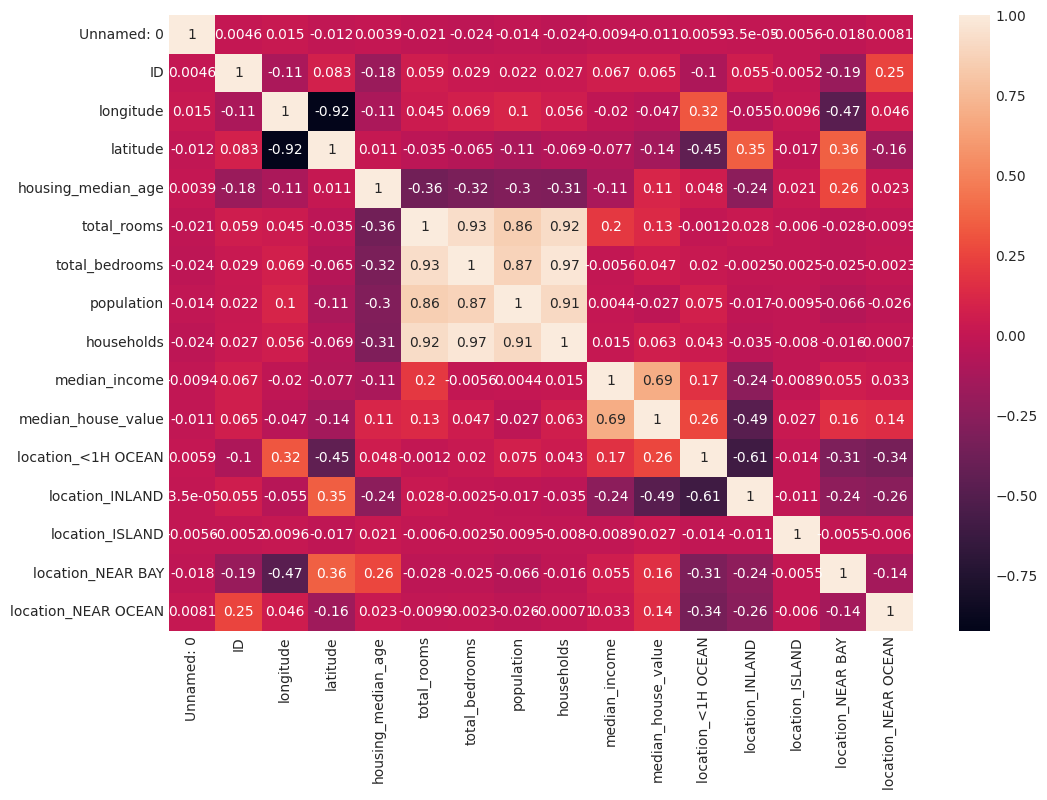

In [26]:
#Potite heatmap pour visualiser les corrélation entre nos feature 
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
data.corr(method='pearson')

,Unnamed: 0,ID,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,location_<1H OCEAN,location_INLAND,location_ISLAND,location_NEAR BAY,location_NEAR OCEAN
Unnamed: 0,1.000000,0.004566,0.015105,-0.012313,0.003905,-0.020528,-0.023649,-0.014485,-0.023855,-0.009420,-0.010626,0.005886,-0.000035,-0.005587,-0.017725,0.008133
ID,0.004566,1.000000,-0.112693,0.082515,-0.180942,0.058565,0.029356,0.022067,0.027158,0.067317,0.065435,-0.100468,0.055224,-0.005187,-0.193198,0.252500
longitude,0.015105,-0.112693,1.000000,-0.924753,-0.109873,0.044776,0.069260,0.099824,0.055629,-0.019501,-0.046754,0.319454,-0.055295,0.009639,-0.473753,0.045553
latitude,-0.012313,0.082515,-0.924753,1.000000,0.010653,-0.035012,-0.064887,-0.106416,-0.068901,-0.076643,-0.143970,-0.445453,0.351102,-0.016639,0.357997,-0.160753
housing_median_age,0.003905,-0.180942,-0.109873,0.010653,1.000000,-0.362083,-0.323283,-0.295541,-0.307466,-0.113804,0.108626,0.047652,-0.240631,0.021161,0.256495,0.022709
total_rooms,-0.020528,0.058565,0.044776,-0.035012,-0.362083,1.000000,0.928996,0.855772,0.920225,0.198840,0.133218,-0.001150,0.027699,-0.006011,-0.028428,-0.009884
total_bedrooms,-0.023649,0.029356,0.069260,-0.064887,-0.323283,0.928996,1.000000,0.874308,0.974292,-0.005610,0.047240,0.019591,-0.002539,-0.002478,-0.024733,-0.002274
population,-0.014485,0.022067,0.099824,-0.106416,-0.295541,0.855772,0.874308,1.000000,0.907647,0.004353,-0.027441,0.075130,-0.016582,-0.009483,-0.065813,-0.026319
households,-0.023855,0.027158,0.055629,-0.068901,-0.307466,0.920225,0.974292,0.907647,1.000000,0.014794,0.063245,0.043118,-0.034784,-0.008018,-0.015538,-0.000714
median_income,-0.009420,0.067317,-0.019501,-0.076643,-0.113804,0.198840,-0.005610,0.004353,0.014794,1.000000,0.689659,0.168707,-0.240873,-0.008918,0.054942,0.033383
